In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline 
from sklearn.impute import KNNImputer

In [3]:
data=pd.read_csv("/content/drive/MyDrive/FTS-Air Quality Index Prediction/data/cities_by_hours.csv")

In [4]:
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,6/30/2020 20:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,6/30/2020 21:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,6/30/2020 22:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,6/30/2020 23:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [5]:
data.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
C6H6          163646
C7H8          220607
C8H10         455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [6]:
data.isnull().mean()*100

City           0.000000
Datetime       0.000000
PM2.5         20.496274
PM10          41.919407
NO            16.476355
NO2           16.545577
NOx           17.407593
NH3           38.501430
CO            12.222073
SO2           18.417517
O3            18.252940
C6H6          23.117923
C7H8          31.164683
C8H10         64.393996
AQI           18.234858
AQI_Bucket    18.234858
dtype: float64

In [7]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


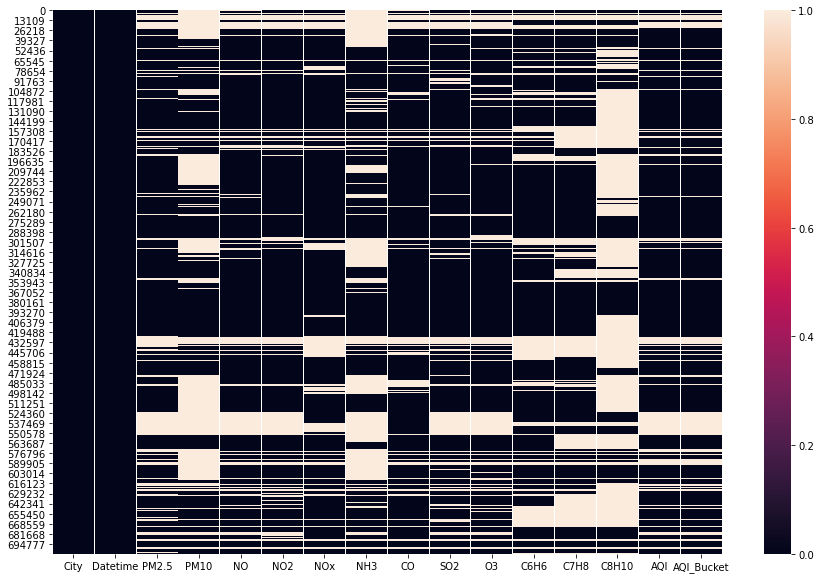

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  C6H6        544229 non-null  float64
 12  C7H8        487268 non-null  float64
 13  C8H10       252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [10]:
num=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','C6H6','C7H8','C8H10']

In [11]:
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

# ***ENCODING CATEGORICAL VARIALBLES***

In [ ]:
City_series = pd.Series(data['City'].unique())
City_series

0              Ahmedabad
1                 Aizawl
2              Amaravati
3               Amritsar
4              Bengaluru
5                 Bhopal
6           Brajrajnagar
7             Chandigarh
8                Chennai
9             Coimbatore
10                 Delhi
11             Ernakulam
12              Gurugram
13              Guwahati
14             Hyderabad
15                Jaipur
16            Jorapokhar
17                 Kochi
18               Kolkata
19               Lucknow
20                Mumbai
21                 Patna
22              Shillong
23               Talcher
24    Thiruvananthapuram
25         Visakhapatnam
dtype: object

In [ ]:
Bucket_series = pd.Series(data['AQI_Bucket'].dropna().unique())
Bucket_series = Bucket_series.sort_values(ignore_index=True)
Bucket_series

0            Good
1        Moderate
2            Poor
3    Satisfactory
4          Severe
5       Very Poor
dtype: object

In [ ]:
data_encoded = data.copy()
#Label Encoding cities with respective index in City_series
encoder=LabelEncoder()
data_encoded[['City']] = data_encoded[['City']].apply(encoder.fit_transform) 

#Label Encoding AQI_Bucket with respective index in Bucket_series
encoder=LabelEncoder()
def encode(col):
  array=np.array(col.dropna())
  array=array.reshape(-1,1)
  array_encoded=encoder.fit_transform(array)
  col.loc[col.notnull()] = np.squeeze(array_encoded)
  return col
encode(data_encoded['AQI_Bucket'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
707870      3
707871      3
707872      0
707873      0
707874      0
Name: AQI_Bucket, Length: 707875, dtype: object

In [ ]:
data_encoded

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,0,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,0,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,0,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,0,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,0,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,25,6/30/2020 20:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,3
707871,25,6/30/2020 21:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,3
707872,25,6/30/2020 22:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,0
707873,25,6/30/2020 23:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,0


In [ ]:
data_encoded.drop(columns=['Datetime'],inplace=True)

In [ ]:
data_encoded.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,0,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,0,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,0,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,0,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,0,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  int64  
 1   PM2.5       562787 non-null  float64
 2   PM10        411138 non-null  float64
 3   NO          591243 non-null  float64
 4   NO2         590753 non-null  float64
 5   NOx         584651 non-null  float64
 6   NH3         435333 non-null  float64
 7   CO          621358 non-null  float64
 8   SO2         577502 non-null  float64
 9   O3          578667 non-null  float64
 10  C6H6        544229 non-null  float64
 11  C7H8        487268 non-null  float64
 12  C8H10       252046 non-null  float64
 13  AQI         578795 non-null  float64
 14  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), int64(1), object(1)
memory usage: 81.0+ MB


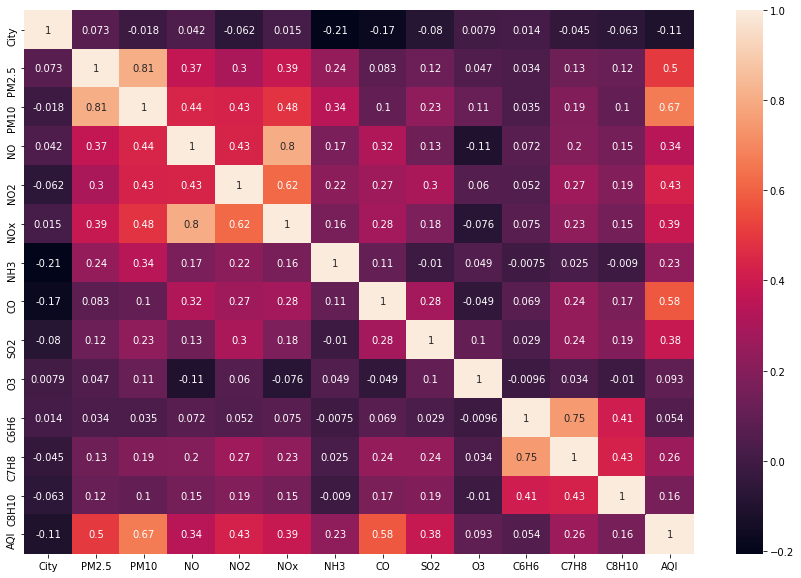

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data_encoded.corr(),annot=True)

In [ ]:
data_encoded.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,0,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,0,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,0,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,0,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,0,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


# ***CITYWISE MISSING VALUE IMPUTATION*** 

## ***1] Mean Imputation***

In [12]:
data1=data.copy()
data1.iloc[:,2:14]=data1.groupby('City').transform(lambda x: x.fillna(x.mean()))
data1.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,67.273271,111.493008,1.00,40.01,36.37,NaN,1.00,122.07,39.067821,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,67.273271,111.493008,0.02,27.75,19.73,NaN,0.02,85.90,39.067821,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,67.273271,111.493008,0.08,19.32,11.08,NaN,0.08,52.83,39.067821,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,67.273271,111.493008,0.30,16.45,9.20,NaN,0.30,39.53,153.580000,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,67.273271,111.493008,0.12,14.90,7.85,NaN,0.12,32.63,39.067821,0.0,0.0,0.0,NaN,NaN


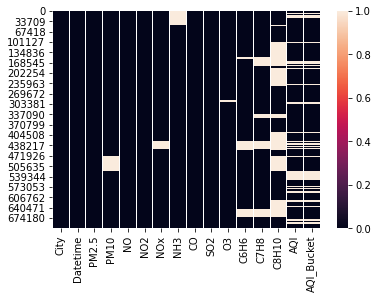

In [13]:
sns.heatmap(data1.isnull())

In [14]:
data1.iloc[:,2:14].mean()

PM2.5     66.122053
PM10     116.263713
NO        18.065442
NO2       28.767380
NOx       32.780101
NH3       23.012932
CO         2.552156
SO2       15.373257
O3        34.444776
C6H6       3.046170
C7H8       8.139344
C8H10      3.125310
dtype: float64

In [15]:
data1.iloc[:,2:14] = data1.fillna(data1.iloc[:,2:14].mean())

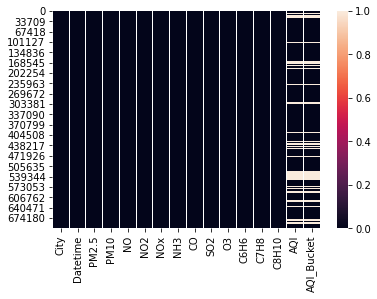

In [16]:
sns.heatmap(data1.isnull())

In [ ]:
data1.to_csv(r'/content/drive/MyDrive/FTS-Air Quality Index Prediction/Akshata-Mean_imputed_dataset.csv', index = False)

## ***2] Imputaion with forward fill and backward fill***

In [17]:
data2=data.copy()
data2.iloc[:,2:14]=data2.groupby('City').transform(lambda x: x.ffill())
data2.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,153.58,0.0,0.0,0.0,NaN,NaN


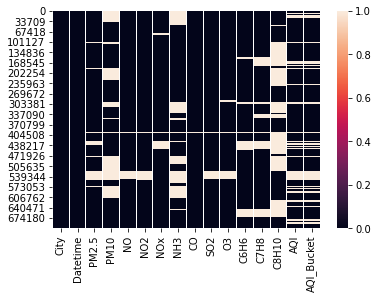

In [18]:
sns.heatmap(data2.isnull())

In [19]:
data2.isnull().sum()

City               0
Datetime           0
PM2.5          58189
PM10          227552
NO             28291
NO2            28308
NOx            37469
NH3           201400
CO               125
SO2            27174
O3             30258
C6H6           75351
C7H8          106191
C8H10         360487
AQI           129080
AQI_Bucket    129080
dtype: int64

In [20]:
data2.iloc[:,2:14]=data2.groupby('City').transform(lambda x: x.bfill())

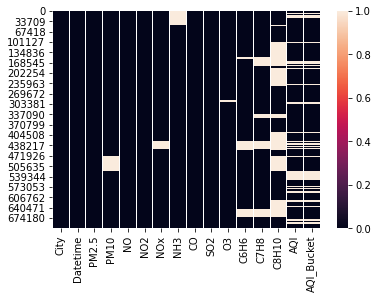

In [21]:
sns.heatmap(data2.isnull())

In [22]:
data2.isnull().sum()

City               0
Datetime           0
PM2.5              0
PM10           48192
NO                 0
NO2                0
NOx            28025
NH3            48192
CO                 0
SO2                0
O3              3852
C6H6           65433
C7H8           96049
C8H10         312656
AQI           129080
AQI_Bucket    129080
dtype: int64

In [23]:
data2.iloc[:,2:14] = data2.groupby('City').transform(lambda x: x.fillna(x.mean()))
data2.iloc[:,2:14] = data2.fillna(data2.iloc[:,2:14].mean())

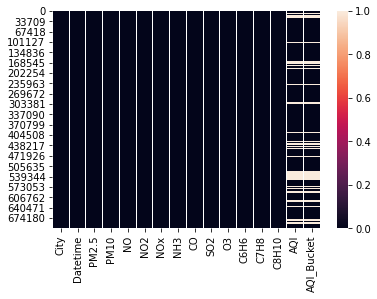

In [24]:
sns.heatmap(data2.isnull())

In [ ]:
data2.to_csv(r'/content/drive/MyDrive/FTS-Air Quality Index Prediction/Akshata-ffill+bfill_imputed_dataset.csv', index = False)

## ***3] KNN Imputation***

In [ ]:
def fun(dframe):
  lis = []
  for i in range(0, dframe.shape[1]):
      if(dframe.iloc[:,i].dtypes == 'object'):
        dframe.iloc[:,i] = pd.Categorical(dframe.iloc[:,i])
        dframe.iloc[:,i] = dframe.iloc[:,i].cat.codes 
        dframe.iloc[:,i] = dframe.iloc[:,i].astype('object')

        lis.append(dframe.columns[i])
  KNN = KNNImputer(n_neighbors=3)
  dframe = pd.DataFrame(KNN.fit_transform(dframe))
  return dframe  

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FTS-Air Quality Index Prediction/data/cities_by_hours.csv')
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
C6H6          163646
C7H8          220607
C8H10         455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [ ]:
df.drop(columns=['Datetime'],inplace=True)
df_group = df.groupby(df.City)

#### Ahmedabad Imputation

In [ ]:
df_Ahm = df_group.get_group("Ahmedabad")

In [ ]:
df_Ahm

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.00,0.00,0.00,NaN,NaN
1,Ahmedabad,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.00,0.00,0.00,NaN,NaN
2,Ahmedabad,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.00,0.00,0.00,NaN,NaN
3,Ahmedabad,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.00,0.00,0.00,NaN,NaN
4,Ahmedabad,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48187,Ahmedabad,42.92,98.36,2.79,84.27,43.19,NaN,1.74,20.27,66.12,0.38,35.89,1.04,119.0,Moderate
48188,Ahmedabad,44.41,88.17,4.28,56.44,30.73,NaN,0.57,15.20,42.41,1.26,43.14,1.57,119.0,Moderate
48189,Ahmedabad,33.68,202.79,4.42,37.66,21.67,NaN,0.66,15.13,25.66,1.73,47.05,1.87,119.0,Moderate
48190,Ahmedabad,56.86,222.73,3.77,29.78,17.34,NaN,0.04,11.66,14.35,1.73,47.05,1.87,119.0,Moderate


In [ ]:
lis = []
for i in range(0, df_Ahm.shape[1]):
  if(df_Ahm.iloc[:,i].dtypes == 'object'):
    df_Ahm.iloc[:,i] = pd.Categorical(df_Ahm.iloc[:,i])
    df_Ahm.iloc[:,i] = df_Ahm.iloc[:,i].cat.codes 
    df_Ahm.iloc[:,i] = df_Ahm.iloc[:,i].astype('object')

    lis.append(df_Ahm.columns[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
lis

['City', 'AQI_Bucket']

In [ ]:
df_Ahm

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,0,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.00,0.00,0.00,NaN,-1
1,0,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.00,0.00,0.00,NaN,-1
2,0,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.00,0.00,0.00,NaN,-1
3,0,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.00,0.00,0.00,NaN,-1
4,0,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.00,0.00,0.00,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48187,0,42.92,98.36,2.79,84.27,43.19,NaN,1.74,20.27,66.12,0.38,35.89,1.04,119.0,1
48188,0,44.41,88.17,4.28,56.44,30.73,NaN,0.57,15.20,42.41,1.26,43.14,1.57,119.0,1
48189,0,33.68,202.79,4.42,37.66,21.67,NaN,0.66,15.13,25.66,1.73,47.05,1.87,119.0,1
48190,0,56.86,222.73,3.77,29.78,17.34,NaN,0.04,11.66,14.35,1.73,47.05,1.87,119.0,1


In [ ]:
from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=3)
df_Ahm = pd.DataFrame(KNN.fit_transform(df_Ahm))

In [ ]:
df_Ahm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,153.736667,109.573333,1.00,40.01,36.37,1.00,122.07,28.113333,0.00,0.00,0.00,122.000000,-1.0
1,0.0,51.200000,64.293333,0.02,27.75,19.73,0.02,85.90,45.203333,0.00,0.00,0.00,133.333333,-1.0
2,0.0,27.066667,89.553333,0.08,19.32,11.08,0.08,52.83,42.930000,0.00,0.00,0.00,122.666667,-1.0
3,0.0,45.436667,56.303333,0.30,16.45,9.20,0.30,39.53,153.580000,0.00,0.00,0.00,148.333333,-1.0
4,0.0,33.690000,97.833333,0.12,14.90,7.85,0.12,32.63,46.066667,0.00,0.00,0.00,91.666667,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48187,0.0,42.920000,98.360000,2.79,84.27,43.19,1.74,20.27,66.120000,0.38,35.89,1.04,119.000000,1.0
48188,0.0,44.410000,88.170000,4.28,56.44,30.73,0.57,15.20,42.410000,1.26,43.14,1.57,119.000000,1.0
48189,0.0,33.680000,202.790000,4.42,37.66,21.67,0.66,15.13,25.660000,1.73,47.05,1.87,119.000000,1.0
48190,0.0,56.860000,222.730000,3.77,29.78,17.34,0.04,11.66,14.350000,1.73,47.05,1.87,119.000000,1.0


####Aizawl Imputation


In [ ]:
df_Aiz = df_group.get_group("Aizawl")

In [ ]:
lis = []
for i in range(0, df_Aiz.shape[1]):
  if(df_Aiz.iloc[:,i].dtypes == 'object'):
    df_Aiz.iloc[:,i] = pd.Categorical(df_Aiz.iloc[:,i])
    df_Aiz.iloc[:,i] = df_Aiz.iloc[:,i].cat.codes 
    df_Aiz.iloc[:,i] = df_Aiz.iloc[:,i].astype('object')

    lis.append(df_Aiz.columns[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=3)
df_Aiz = pd.DataFrame(KNN.fit_transform(df_Aiz))

In [ ]:
df_Aiz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,42.000000,51.28,4.27,0.97,6.66,19.88,0.37,3.35,8.583333,0.000000,0.576667,19.0,-1.0
1,0.0,41.170000,49.96,4.51,1.27,7.24,21.55,0.38,3.44,5.963333,0.000000,0.713333,19.0,-1.0
2,0.0,24.970000,42.04,7.25,5.45,14.56,20.25,0.50,3.93,6.950000,0.000000,0.173333,19.0,-1.0
3,0.0,26.950000,38.86,7.31,2.52,12.13,21.94,0.52,3.93,2.420000,0.000000,0.090000,19.0,-1.0
4,0.0,17.420000,37.15,7.25,1.58,11.14,25.71,0.49,4.36,4.476667,0.000000,0.000000,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,0.0,2.393333,7.62,11.55,0.10,15.27,25.70,0.12,2.88,1.360000,0.003333,0.080000,20.0,0.0
2676,0.0,0.156667,4.66,11.38,0.02,14.99,24.26,0.08,2.49,3.510000,0.006667,0.046667,20.0,0.0
2677,0.0,2.333333,11.63,11.36,0.10,15.18,22.31,0.04,2.23,4.900000,0.053333,0.280000,20.0,0.0
2678,0.0,7.510000,15.50,11.49,0.03,15.09,20.79,0.03,2.19,2.920000,25.706667,25.750000,20.0,0.0


####Amaravati Imputation

In [ ]:
df_Ama = df_group.get_group("Amaravati")
lis = []
for i in range(0, df_Ama.shape[1]):
  if(df_Ama.iloc[:,i].dtypes == 'object'):
    df_Ama.iloc[:,i] = pd.Categorical(df_Ama.iloc[:,i])
    df_Ama.iloc[:,i] = df_Ama.iloc[:,i].cat.codes 
    df_Ama.iloc[:,i] = df_Ama.iloc[:,i].astype('object')

    lis.append(df_Ama.columns[i])
from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=3)
df_Ama = pd.DataFrame(KNN.fit_transform(df_Ama))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_Ama

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,0.100000,49.666667,-1.0
1,0.0,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,0.150000,32.000000,-1.0
2,0.0,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,0.180000,49.666667,-1.0
3,0.0,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,0.100000,49.666667,-1.0
4,0.0,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,0.080000,49.666667,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,0.0,28.75,39.00,1.50,14.05,8.68,9.40,0.76,11.95,39.98,0.32,1.40,0.150000,78.000000,3.0
22780,0.0,24.50,46.50,2.02,18.85,11.70,10.25,0.74,12.85,34.98,0.38,2.55,0.280000,78.000000,3.0
22781,0.0,30.25,49.00,1.33,17.10,10.20,9.82,0.71,11.78,29.32,0.30,3.85,0.320000,78.000000,3.0
22782,0.0,24.25,40.75,1.23,10.82,6.78,8.75,0.61,11.12,31.77,0.12,1.10,0.300000,55.000000,3.0


####Amritsar Imputation

In [ ]:
df_Amr = df_group.get_group("Amritsar")
lis = []
for i in range(0, df_Amr.shape[1]):
  if(df_Amr.iloc[:,i].dtypes == 'object'):
    df_Amr.iloc[:,i] = pd.Categorical(df_Amr.iloc[:,i])
    df_Amr.iloc[:,i] = df_Amr.iloc[:,i].cat.codes 
    df_Amr.iloc[:,i] = df_Amr.iloc[:,i].astype('object')

    lis.append(df_Amr.columns[i])
from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=3)
df_Amr = pd.DataFrame(KNN.fit_transform(df_Amr))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_Amr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,19.610000,22.880000,15.71,8.940000,0.000000,1.14,0.730000,3.106667,10.520000,0.450000,0.000000,0.000000,50.000000,-1.0
1,0.0,23.580000,22.030000,13.96,8.200000,0.000000,0.93,0.710000,4.200000,10.570000,0.450000,0.000000,0.000000,50.000000,-1.0
2,0.0,18.233333,18.066667,14.72,8.366667,22.843333,1.34,0.653333,16.120000,10.436667,7.193333,5.440000,2.960000,39.333333,-1.0
3,0.0,11.510000,9.290000,14.49,7.960000,0.000000,1.95,0.520000,15.400000,10.220000,0.733333,0.566667,0.000000,48.333333,-1.0
4,0.0,10.080000,12.580000,15.28,8.260000,0.000000,1.99,0.460000,16.930000,10.470000,1.063333,0.000000,3.626667,48.333333,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29264,0.0,42.200000,72.740000,28.80,26.250000,42.780000,14.44,0.720000,5.480000,16.480000,1.300000,1.100000,8.810000,75.000000,3.0
29265,0.0,61.850000,73.140000,29.15,23.040000,43.280000,13.60,0.740000,4.580000,16.480000,1.300000,1.100000,8.810000,75.000000,3.0
29266,0.0,65.110000,88.780000,24.69,15.960000,29.200000,15.97,0.650000,4.140000,16.480000,1.300000,1.100000,8.820000,75.000000,3.0
29267,0.0,67.400000,102.720000,27.68,15.610000,31.130000,13.61,0.590000,3.600000,16.480000,1.300000,1.100000,8.820000,76.000000,3.0


####Bengaluru Imputation

In [ ]:

df_Ben = df_group.get_group("Bengaluru")
lis = []
for i in range(0, df_Ben.shape[1]):
  if(df_Ben.iloc[:,i].dtypes == 'object'):
    df_Ben.iloc[:,i] = pd.Categorical(df_Ben.iloc[:,i])
    df_Ben.iloc[:,i] = df_Ben.iloc[:,i].cat.codes 
    df_Ben.iloc[:,i] = df_Ben.iloc[:,i].astype('object')

    lis.append(df_Ben.columns[i])
from sklearn.impute import KNNImputer
KNN = KNNImputer(n_neighbors=3)
df_Ben = pd.DataFrame(KNN.fit_transform(df_Ben))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Bhopal Imputation

In [ ]:

df_Bho = df_group.get_group("Bhopal")
df_Bho = fun(df_Bho)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Brajrajnagar Imputation

In [ ]:

df_Braj = df_group.get_group("Brajrajnagar")
df_Braj = fun(df_Braj)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Chandigarh Imputation

In [ ]:
df_Cha = df_group.get_group('Chandigarh')
df_Cha = fun(df_Cha)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Chennai Imputation

In [ ]:
df_Che = df_group.get_group('Chennai')
df_Che = fun(df_Che)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Coimbatore Imputation

In [ ]:
df_Coi = df_group.get_group('Coimbatore')
df_Coi = fun(df_Coi)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Delhi Imputation

In [ ]:
df_Del = df_group.get_group('Delhi')
df_Del = fun(df_Del)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Ernakulam Imputation

In [ ]:
df_Ern = df_group.get_group('Ernakulam')
df_Ern = fun(df_Ern)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Gurugram Imputation

In [ ]:
df_Gur = df_group.get_group('Gurugram')
df_Gur = fun(df_Gur)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Guwahati Imputation

In [ ]:
df_Guw = df_group.get_group('Guwahati')
df_Guw = fun(df_Guw)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Hyderabad Imputation

In [ ]:
df_Hyd = df_group.get_group('Hyderabad')
df_Hyd = fun(df_Hyd)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Jaipur Imputation

In [ ]:
df_Jai = df_group.get_group('Jaipur')
df_Jai = fun(df_Jai)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Jorapokhar Imputation

In [ ]:
df_Jor = df_group.get_group('Jorapokhar')
df_Jor = fun(df_Jor)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Kochi Imputation

In [ ]:
df_Koc = df_group.get_group('Kochi')
df_Koc = fun(df_Koc)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Kolkata Imputation

In [ ]:
df_Kol = df_group.get_group('Kolkata')
df_Kol = fun(df_Kol)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Lucknow Imputation

In [ ]:

df_Luc = df_group.get_group('Lucknow')
df_Luc = fun(df_Luc)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Mumbai Imputation

In [ ]:

df_Mum = df_group.get_group('Mumbai')
df_Mum = fun(df_Mum)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Patna Imputation

In [ ]:

df_Pat = df_group.get_group('Patna')
df_Pat = fun(df_Pat)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Shillong Imputation

In [ ]:

df_Shi = df_group.get_group('Shillong')
df_Shi = fun(df_Shi)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Talcher Imputation

In [ ]:

df_Tal = df_group.get_group('Talcher')
df_Tal = fun(df_Tal)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Thiruvananthapuram Imputation

In [ ]:

df_Thi = df_group.get_group('Thiruvananthapuram')
df_Thi = fun(df_Thi)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Visakhapatnam Imputation

In [ ]:

df_Vis = df_group.get_group('Visakhapatnam')
df_Vis = fun(df_Vis)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


####Concat dataset

In [ ]:
df_Aiz[0]=df_Aiz[0].replace(to_replace=0.0,value=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,42.000000,51.28,4.27,0.97,6.66,19.88,0.37,3.35,8.583333,0.000000,0.576667,19.0,-1.0
1,1.0,41.170000,49.96,4.51,1.27,7.24,21.55,0.38,3.44,5.963333,0.000000,0.713333,19.0,-1.0
2,1.0,24.970000,42.04,7.25,5.45,14.56,20.25,0.50,3.93,6.950000,0.000000,0.173333,19.0,-1.0
3,1.0,26.950000,38.86,7.31,2.52,12.13,21.94,0.52,3.93,2.420000,0.000000,0.090000,19.0,-1.0
4,1.0,17.420000,37.15,7.25,1.58,11.14,25.71,0.49,4.36,4.476667,0.000000,0.000000,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,1.0,2.393333,7.62,11.55,0.10,15.27,25.70,0.12,2.88,1.360000,0.003333,0.080000,20.0,0.0
2676,1.0,0.156667,4.66,11.38,0.02,14.99,24.26,0.08,2.49,3.510000,0.006667,0.046667,20.0,0.0
2677,1.0,2.333333,11.63,11.36,0.10,15.18,22.31,0.04,2.23,4.900000,0.053333,0.280000,20.0,0.0
2678,1.0,7.510000,15.50,11.49,0.03,15.09,20.79,0.03,2.19,2.920000,25.706667,25.750000,20.0,0.0


In [ ]:
frames = [df_Ahm,df_Aiz,df_Ama,df_Amr,df_Ben,df_Bho,df_Braj,df_Cha,df_Che,df_Coi,df_Del,df_Ern,df_Gur,df_Guw,df_Hyd,df_Jai,df_Jor,df_Koc,df_Kol,df_Luc,df_Mum,df_Pat,df_Shi,df_Tal,df_Thi,df_Vis]

In [ ]:
for (df_city,code) in zip(frame,range(0,26)):
  df_city[0]=df_city[0].replace(to_replace=0.0,value=code)

In [ ]:
print(df['City'].unique())

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [ ]:
final_df = pd.concat(frames,ignore_index=True)

In [ ]:
final_df.shape

(707875, 15)

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,153.736667,109.573333,1.00,40.01,36.37,1.00,122.07,28.113333,0.00,0.000000,0.000000,122.000000,-1.0,NaN
1,0.0,51.200000,64.293333,0.02,27.75,19.73,0.02,85.90,45.203333,0.00,0.000000,0.000000,133.333333,-1.0,NaN
2,0.0,27.066667,89.553333,0.08,19.32,11.08,0.08,52.83,42.930000,0.00,0.000000,0.000000,122.666667,-1.0,NaN
3,0.0,45.436667,56.303333,0.30,16.45,9.20,0.30,39.53,153.580000,0.00,0.000000,0.000000,148.333333,-1.0,NaN
4,0.0,33.690000,97.833333,0.12,14.90,7.85,0.12,32.63,46.066667,0.00,0.000000,0.000000,91.666667,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,25.0,9.500000,36.000000,2.75,25.57,15.85,4.57,0.62,30.716667,27.75,3.933333,8.650000,1.500000,51.0,3.0
707871,25.0,17.250000,49.250000,3.62,33.20,20.62,3.78,0.76,2.020000,25.58,3.350000,7.420000,3.200000,51.0,3.0
707872,25.0,36.000000,71.000000,2.20,30.80,18.20,3.67,0.58,1.770000,26.15,3.610000,8.090000,2.490000,50.0,0.0
707873,25.0,15.750000,63.000000,1.02,28.90,16.00,3.80,0.49,0.750000,15.82,3.156667,6.833333,2.383333,50.0,0.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       707875 non-null  float64
 1   1       707875 non-null  float64
 2   2       707875 non-null  float64
 3   3       707875 non-null  float64
 4   4       707875 non-null  float64
 5   5       707875 non-null  float64
 6   6       707875 non-null  float64
 7   7       707875 non-null  float64
 8   8       707875 non-null  float64
 9   9       707875 non-null  float64
 10  10      707875 non-null  float64
 11  11      679850 non-null  float64
 12  12      646296 non-null  float64
 13  13      559780 non-null  float64
 14  14      343175 non-null  float64
dtypes: float64(15)
memory usage: 81.0 MB


In [ ]:
final_df[0]=final_df[0].astype(str)
final_df[13]=final_df[13].astype(str)
final_df[14]=final_df[14].astype(str)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       707875 non-null  object 
 1   1       707875 non-null  float64
 2   2       707875 non-null  float64
 3   3       707875 non-null  float64
 4   4       707875 non-null  float64
 5   5       707875 non-null  float64
 6   6       707875 non-null  float64
 7   7       707875 non-null  float64
 8   8       707875 non-null  float64
 9   9       707875 non-null  float64
 10  10      707875 non-null  float64
 11  11      679850 non-null  float64
 12  12      646296 non-null  float64
 13  13      559780 non-null  float64
 14  14      343175 non-null  float64
dtypes: float64(14), object(1)
memory usage: 81.0+ MB


In [ ]:
lst=[]
for i in range(0,26):
  lst.append(str(i)+'.'+'0')
lst

['0.0',
 '1.0',
 '2.0',
 '3.0',
 '4.0',
 '5.0',
 '6.0',
 '7.0',
 '8.0',
 '9.0',
 '10.0',
 '11.0',
 '12.0',
 '13.0',
 '14.0',
 '15.0',
 '16.0',
 '17.0',
 '18.0',
 '19.0',
 '20.0',
 '21.0',
 '22.0',
 '23.0',
 '24.0',
 '25.0']

In [ ]:
final_df[0] = final_df[0].replace(to_replace=lst,value=df['City'].unique())

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Ahmedabad,153.736667,109.573333,1.00,40.01,36.37,1.00,122.07,28.113333,0.00,0.000000,0.000000,122.000000,-1.0,nan
1,Ahmedabad,51.200000,64.293333,0.02,27.75,19.73,0.02,85.90,45.203333,0.00,0.000000,0.000000,133.333333,-1.0,nan
2,Ahmedabad,27.066667,89.553333,0.08,19.32,11.08,0.08,52.83,42.930000,0.00,0.000000,0.000000,122.666667,-1.0,nan
3,Ahmedabad,45.436667,56.303333,0.30,16.45,9.20,0.30,39.53,153.580000,0.00,0.000000,0.000000,148.333333,-1.0,nan
4,Ahmedabad,33.690000,97.833333,0.12,14.90,7.85,0.12,32.63,46.066667,0.00,0.000000,0.000000,91.666667,-1.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,9.500000,36.000000,2.75,25.57,15.85,4.57,0.62,30.716667,27.75,3.933333,8.650000,1.500000,51.0,3.0
707871,Visakhapatnam,17.250000,49.250000,3.62,33.20,20.62,3.78,0.76,2.020000,25.58,3.350000,7.420000,3.200000,51.0,3.0
707872,Visakhapatnam,36.000000,71.000000,2.20,30.80,18.20,3.67,0.58,1.770000,26.15,3.610000,8.090000,2.490000,50.0,0.0
707873,Visakhapatnam,15.750000,63.000000,1.02,28.90,16.00,3.80,0.49,0.750000,15.82,3.156667,6.833333,2.383333,50.0,0.0


In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
dictionary={0:'City',1:'PM2.5',2:'PM10',3:'NO',4:'NO2',5:'NOx',6:'NH3',7:'CO',8:'SO2',9:'O3',10:'C6H6',11:'C7H8',12:'C8H10',13:'AQI',14:'AQI_Bucket'}
final_df=final_df.rename(columns=dictionary)

In [ ]:
final_df.drop(columns=['AQI','AQI_Bucket'],inplace=True)
final_df['AQI']=df['AQI']
final_df['AQI_Bucket']=df['AQI_Bucket']

In [ ]:
final_df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,153.736667,109.573333,1.00,40.01,36.37,1.00,122.07,28.113333,0.00,0.000000,0.000000,122.000000,NaN,NaN
1,Ahmedabad,51.200000,64.293333,0.02,27.75,19.73,0.02,85.90,45.203333,0.00,0.000000,0.000000,133.333333,NaN,NaN
2,Ahmedabad,27.066667,89.553333,0.08,19.32,11.08,0.08,52.83,42.930000,0.00,0.000000,0.000000,122.666667,NaN,NaN
3,Ahmedabad,45.436667,56.303333,0.30,16.45,9.20,0.30,39.53,153.580000,0.00,0.000000,0.000000,148.333333,NaN,NaN
4,Ahmedabad,33.690000,97.833333,0.12,14.90,7.85,0.12,32.63,46.066667,0.00,0.000000,0.000000,91.666667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,9.500000,36.000000,2.75,25.57,15.85,4.57,0.62,30.716667,27.75,3.933333,8.650000,1.500000,51.0,Satisfactory
707871,Visakhapatnam,17.250000,49.250000,3.62,33.20,20.62,3.78,0.76,2.020000,25.58,3.350000,7.420000,3.200000,51.0,Satisfactory
707872,Visakhapatnam,36.000000,71.000000,2.20,30.80,18.20,3.67,0.58,1.770000,26.15,3.610000,8.090000,2.490000,50.0,Good
707873,Visakhapatnam,15.750000,63.000000,1.02,28.90,16.00,3.80,0.49,0.750000,15.82,3.156667,6.833333,2.383333,50.0,Good


In [ ]:
final_df.to_csv('/content/sample_data/final_imputation.csv')

# ***Calculating AQI (Air Quality Index)***

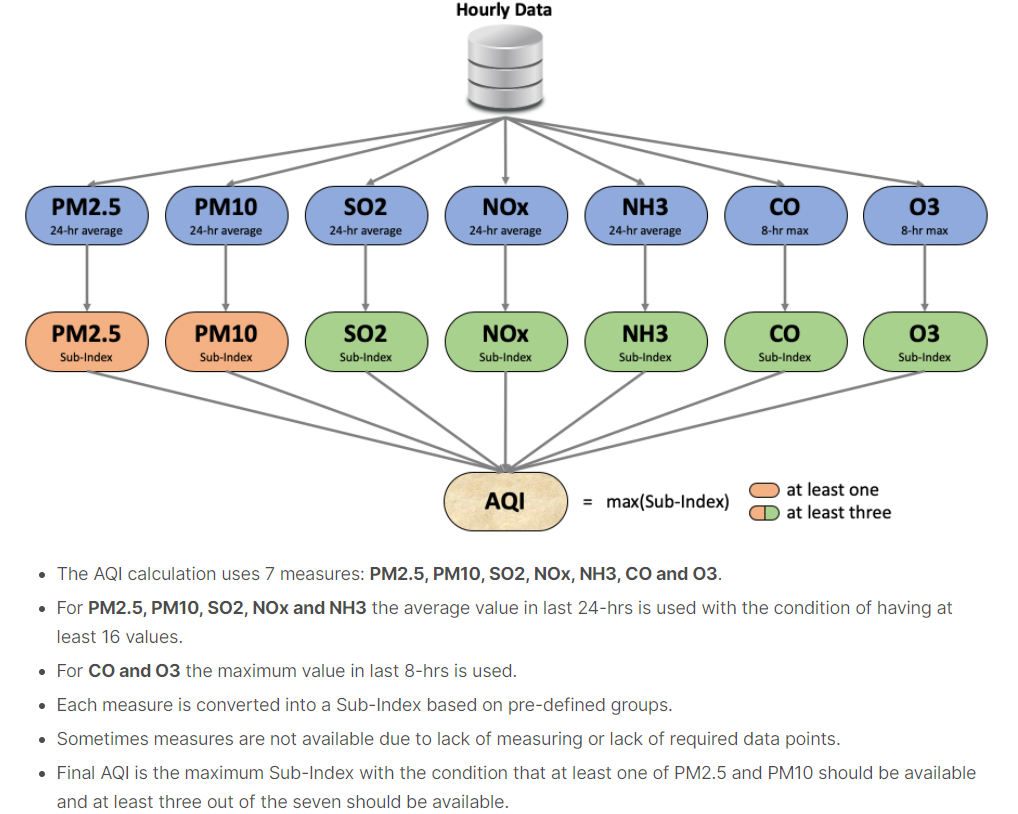

In [ ]:
def aqi_calc(df):
  df["PM10_24hr_avg"] = df.groupby("City")["PM10"].rolling(window = 24, min_periods = 1).mean().values
  df["PM2.5_24hr_avg"] = df.groupby("City")["PM2.5"].rolling(window = 24, min_periods = 1).mean().values
  df["SO2_24hr_avg"] = df.groupby("City")["SO2"].rolling(window = 24, min_periods = 1).mean().values
  df["NOx_24hr_avg"] = df.groupby("City")["NOx"].rolling(window = 24, min_periods = 1).mean().values
  df["NH3_24hr_avg"] = df.groupby("City")["NH3"].rolling(window = 24, min_periods = 1).mean().values
  df["CO_8hr_max"] = df.groupby("City")["CO"].rolling(window = 8, min_periods = 1).max().values
  df["O3_8hr_max"] = df.groupby("City")["O3"].rolling(window = 8, min_periods = 1).max().values


  #PM2.5 (Particulate Matter 2.5-micrometer)
  #PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

  df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))


  #PM10 (Particulate Matter 10-micrometer)
  #PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

  df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))


  #SO2 (Sulphur Dioxide)
  #SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

  df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))


  #NOx (Any Nitric x-oxide)
  #NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:
  def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

  df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))


  #NH3 (Ammonia)
  #NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below: 
  def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

  df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))


  #CO (Carbon Monoxide)
  #CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:
  def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

  df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))


  #O3 (Ozone or Trioxygen)
  #O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

  df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))
  

  def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

  df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

  df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
  df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
  df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

  df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
  df[~df.AQI_calculated.isna()].head(13)

AQI-->
The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.
The pre-defined buckets of AQI are as follows:

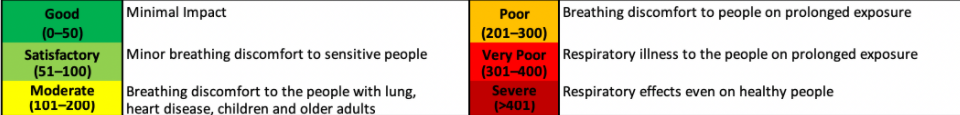

## ***AQI calc for mean imputed dataset***

In [ ]:
aqi_calc(data1)

In [ ]:
data1["AQI_calculated"].isnull().sum()

0

In [ ]:
data1.head(30)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015 1:00,67.273271,111.493008,1.00,40.01,36.37,23.012932,1.00,122.07,39.067821,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,122.070000,36.370000,23.012932,1.00,39.067821,124.244236,107.662005,114.023333,45.462500,5.753233,50.000,39.067821,7,124.0,Moderate
1,Ahmedabad,1/1/2015 2:00,67.273271,111.493008,0.02,27.75,19.73,23.012932,0.02,85.90,39.067821,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,103.985000,28.050000,23.012932,1.00,39.067821,124.244236,107.662005,107.995000,35.062500,5.753233,50.000,39.067821,7,124.0,Moderate
2,Ahmedabad,1/1/2015 3:00,67.273271,111.493008,0.08,19.32,11.08,23.012932,0.08,52.83,39.067821,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,86.933333,22.393333,23.012932,1.00,39.067821,124.244236,107.662005,102.311111,27.991667,5.753233,50.000,39.067821,7,124.0,Moderate
3,Ahmedabad,1/1/2015 4:00,67.273271,111.493008,0.30,16.45,9.20,23.012932,0.30,39.53,153.580000,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,75.082500,19.095000,23.012932,1.00,153.580000,124.244236,107.662005,93.853125,23.868750,5.753233,50.000,178.794118,7,179.0,Moderate
4,Ahmedabad,1/1/2015 5:00,67.273271,111.493008,0.12,14.90,7.85,23.012932,0.12,32.63,39.067821,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,66.592000,16.846000,23.012932,1.00,153.580000,124.244236,107.662005,83.240000,21.057500,5.753233,50.000,178.794118,7,179.0,Moderate
5,Ahmedabad,1/1/2015 6:00,67.273271,111.493008,0.33,15.95,10.82,23.012932,0.33,29.87,64.250000,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,60.471667,15.841667,23.012932,1.00,153.580000,124.244236,107.662005,75.589583,19.802083,5.753233,50.000,178.794118,7,179.0,Moderate
6,Ahmedabad,1/1/2015 7:00,67.273271,111.493008,0.45,15.94,12.47,23.012932,0.45,27.41,191.960000,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,55.748571,15.360000,23.012932,1.00,191.960000,124.244236,107.662005,69.685714,19.200000,5.753233,50.000,259.900000,7,260.0,Poor
7,Ahmedabad,1/1/2015 8:00,67.273271,111.493008,1.03,16.66,16.48,23.012932,1.03,20.92,177.210000,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,51.395000,15.500000,23.012932,1.03,191.960000,124.244236,107.662005,64.243750,19.375000,5.753233,51.500,259.900000,7,260.0,Poor
8,Ahmedabad,1/1/2015 9:00,67.273271,111.493008,1.47,16.25,18.02,23.012932,1.47,16.45,122.080000,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,47.512222,15.780000,23.012932,1.47,191.960000,124.244236,107.662005,59.390278,19.725000,5.753233,73.500,259.900000,7,260.0,Poor
9,Ahmedabad,1/1/2015 10:00,67.273271,111.493008,2.05,13.78,16.08,23.012932,2.05,15.14,39.067821,0.0,0.00,0.0,NaN,NaN,111.493008,67.273271,44.275000,15.810000,23.012932,2.05,191.960000,124.244236,107.662005,55.343750,19.762500,5.753233,100.625,259.900000,7,260.0,Poor


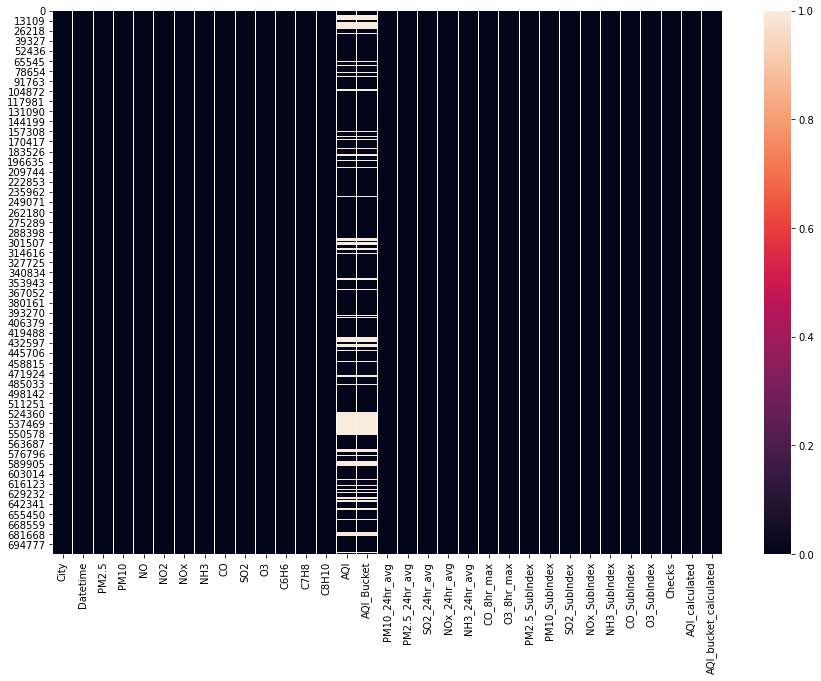

In [ ]:
plt.figure(figsize=(15,10)),
sns.heatmap(data1.isnull())

In [ ]:
data1.to_csv(r'/content/drive/MyDrive/Colab Notebooks/AQI_after_mean_imp.csv', index = False)

## ***AQI calc for ffill-bfill imputed dataset***

In [ ]:
aqi_calc(data2)

In [ ]:
data2

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015 1:00,36.60,120.06,1.00,40.01,36.37,24.450727,1.00,122.07,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,122.070000,36.370000,24.450727,1.00,153.58,61.000000,113.373333,114.023333,45.462500,6.112682,50.0,178.794118,7,179.0,Moderate
1,Ahmedabad,1/1/2015 2:00,36.60,120.06,0.02,27.75,19.73,24.450727,0.02,85.90,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,103.985000,28.050000,24.450727,1.00,153.58,61.000000,113.373333,107.995000,35.062500,6.112682,50.0,178.794118,7,179.0,Moderate
2,Ahmedabad,1/1/2015 3:00,36.60,120.06,0.08,19.32,11.08,24.450727,0.08,52.83,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,86.933333,22.393333,24.450727,1.00,153.58,61.000000,113.373333,102.311111,27.991667,6.112682,50.0,178.794118,7,179.0,Moderate
3,Ahmedabad,1/1/2015 4:00,36.60,120.06,0.30,16.45,9.20,24.450727,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,75.082500,19.095000,24.450727,1.00,153.58,61.000000,113.373333,93.853125,23.868750,6.112682,50.0,178.794118,7,179.0,Moderate
4,Ahmedabad,1/1/2015 5:00,36.60,120.06,0.12,14.90,7.85,24.450727,0.12,32.63,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,66.592000,16.846000,24.450727,1.00,153.58,61.000000,113.373333,83.240000,21.057500,6.112682,50.0,178.794118,7,179.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,6/30/2020 20:00,9.50,36.00,2.75,25.57,15.85,4.570000,0.62,1.85,27.75,0.0,0.0,0.0,51.0,Satisfactory,48.000000,16.156250,9.264583,17.695833,10.135000,0.66,50.73,26.927083,48.000000,11.580729,22.119792,2.533750,33.0,50.730000,7,51.0,Satisfactory
707871,Visakhapatnam,6/30/2020 21:00,17.25,49.25,3.62,33.20,20.62,3.780000,0.76,2.02,25.58,0.0,0.0,0.0,51.0,Satisfactory,48.447917,16.218750,9.118333,18.109167,10.036250,0.76,50.73,27.031250,48.447917,11.397917,22.636458,2.509062,38.0,50.730000,7,51.0,Satisfactory
707872,Visakhapatnam,6/30/2020 22:00,36.00,71.00,2.20,30.80,18.20,3.670000,0.58,1.77,26.15,0.0,0.0,0.0,50.0,Good,49.770833,16.895833,9.102500,18.496667,10.007917,0.76,41.55,28.159722,49.770833,11.378125,23.120833,2.501979,38.0,41.550000,7,50.0,Good
707873,Visakhapatnam,6/30/2020 23:00,15.75,63.00,1.02,28.90,16.00,3.800000,0.49,0.75,15.82,0.0,0.0,0.0,50.0,Good,49.968750,16.635417,9.115000,18.799583,10.031667,0.76,41.38,27.725694,49.968750,11.393750,23.499479,2.507917,38.0,41.380000,7,50.0,Good


## ***AQI calc for KNN imputed dataset***

In [ ]:
aqi_calc(final_df)

In [ ]:
final_df["AQI_calculated"].isnull().sum()

0

In [ ]:
final_df.head(30)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,153.736667,109.573333,1.00,40.01,36.37,1.00,122.07,28.113333,0.0,0.00,0.0,122.000000,NaN,NaN,109.573333,153.736667,28.113333,36.370000,1.000000,122.07,0.0,325.951282,106.382222,35.141667,45.462500,0.250000,918.058824,0.0,6,918.0,Severe
1,Ahmedabad,51.200000,64.293333,0.02,27.75,19.73,0.02,85.90,45.203333,0.0,0.00,0.0,133.333333,NaN,NaN,86.933333,102.468333,36.658333,28.050000,0.510000,122.07,0.0,241.561111,86.933333,45.822917,35.062500,0.127500,918.058824,0.0,6,918.0,Severe
2,Ahmedabad,27.066667,89.553333,0.08,19.32,11.08,0.08,52.83,42.930000,0.0,0.00,0.0,122.666667,NaN,NaN,87.806667,77.334444,38.748889,22.393333,0.366667,122.07,0.0,157.781481,87.806667,48.436111,27.991667,0.091667,918.058824,0.0,6,918.0,Severe
3,Ahmedabad,45.436667,56.303333,0.30,16.45,9.20,0.30,39.53,153.580000,0.0,0.00,0.0,148.333333,NaN,NaN,79.930833,69.360000,67.456667,19.095000,0.350000,122.07,0.0,131.200000,79.930833,84.320833,23.868750,0.087500,918.058824,0.0,6,918.0,Severe
4,Ahmedabad,33.690000,97.833333,0.12,14.90,7.85,0.12,32.63,46.066667,0.0,0.00,0.0,91.666667,NaN,NaN,83.511333,62.226000,63.178667,16.846000,0.304000,122.07,0.0,107.420000,83.511333,78.973333,21.057500,0.076000,918.058824,0.0,6,918.0,Severe
5,Ahmedabad,60.076667,86.340000,0.33,15.95,10.82,0.33,29.87,64.250000,0.0,0.00,0.0,122.000000,NaN,NaN,83.982778,61.867778,63.357222,15.841667,0.308333,122.07,0.0,106.225926,83.982778,79.196528,19.802083,0.077083,918.058824,0.0,6,918.0,Severe
6,Ahmedabad,57.756667,88.526667,0.45,15.94,12.47,0.45,27.41,191.960000,0.0,0.00,0.0,122.000000,NaN,NaN,84.631905,61.280476,81.729048,15.360000,0.328571,122.07,0.0,104.268254,84.631905,100.576349,19.200000,0.082143,918.058824,0.0,6,918.0,Severe
7,Ahmedabad,62.466667,88.156667,1.03,16.66,16.48,1.03,20.92,177.210000,0.0,0.00,0.0,152.333333,NaN,NaN,85.072500,61.428750,93.664167,15.500000,0.416250,122.07,0.0,104.762500,85.072500,104.554722,19.375000,0.104063,918.058824,0.0,6,918.0,Severe
8,Ahmedabad,61.933333,83.586667,1.47,16.25,18.02,1.47,16.45,122.080000,0.0,0.00,0.0,160.333333,NaN,NaN,84.907407,61.484815,96.821481,15.780000,0.533333,85.90,0.0,104.949383,84.907407,105.607160,19.725000,0.133333,705.294118,0.0,6,705.0,Severe
9,Ahmedabad,72.410000,82.263333,2.05,13.78,16.08,2.05,15.14,95.586667,0.0,0.00,0.0,95.666667,NaN,NaN,84.643000,62.577333,96.698000,15.810000,0.685000,52.83,0.0,108.591111,84.643000,105.566000,19.762500,0.171250,510.764706,0.0,6,511.0,Severe


In [ ]:
#data1--->Mean Imputed Dataset
#data2--->Forward-Backward fill Imputed Dataset
#final_df--->KNN Imputed Dataset

# ***OUTLIER TREATMENT***

In [ ]:
def outlier(df):
  Q1=df['AQI_calculated'].quantile(0.25)
  Q3=df['AQI_calculated'].quantile(0.75)
  IQR=Q3-Q1
  print(Q1)
  print(Q3)
  print(IQR)
  Lower_Whisker = Q1 - 1.5*IQR
  Upper_Whisker = Q3 + 1.5*IQR
  print(Lower_Whisker, Upper_Whisker)
  df = df[df['AQI_calculated']< Upper_Whisker]
  return df

## **for data1**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of calculated Air Quality Index')

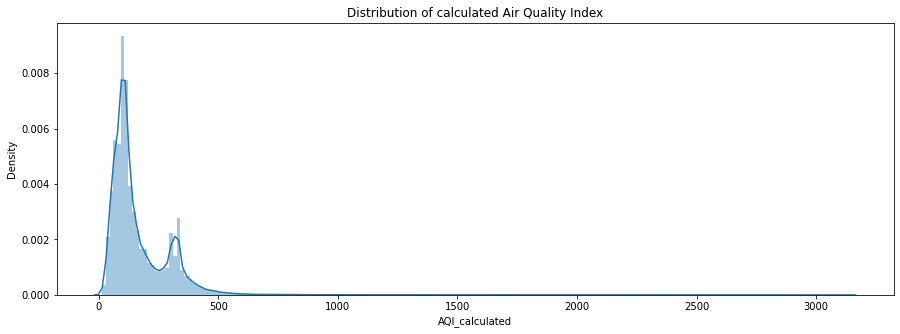

In [ ]:
plt.figure(figsize=(15,5)),
sns.distplot(data1['AQI_calculated'],bins=200)
plt.title('Distribution of calculated Air Quality Index')

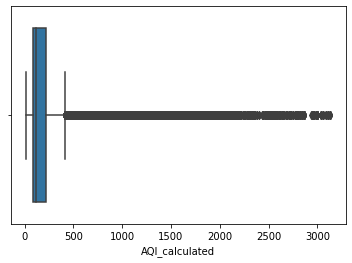

In [ ]:
sns.boxplot(data=data1,x='AQI_calculated')

In [ ]:
data1=outlier(data1)

88.0
217.0
129.0
-105.5 410.5


In [ ]:
data1

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015 1:00,67.273271,111.493008,1.00,40.01,36.37,23.012932,1.00,122.070000,39.067821,0.000000,0.000000,0.000000,NaN,NaN,111.493008,67.273271,122.070000,36.370000,23.012932,1.00,39.067821,124.244236,107.662005,114.023333,45.462500,5.753233,50.0,39.067821,7,124.0,Moderate
1,Ahmedabad,1/1/2015 2:00,67.273271,111.493008,0.02,27.75,19.73,23.012932,0.02,85.900000,39.067821,0.000000,0.000000,0.000000,NaN,NaN,111.493008,67.273271,103.985000,28.050000,23.012932,1.00,39.067821,124.244236,107.662005,107.995000,35.062500,5.753233,50.0,39.067821,7,124.0,Moderate
2,Ahmedabad,1/1/2015 3:00,67.273271,111.493008,0.08,19.32,11.08,23.012932,0.08,52.830000,39.067821,0.000000,0.000000,0.000000,NaN,NaN,111.493008,67.273271,86.933333,22.393333,23.012932,1.00,39.067821,124.244236,107.662005,102.311111,27.991667,5.753233,50.0,39.067821,7,124.0,Moderate
3,Ahmedabad,1/1/2015 4:00,67.273271,111.493008,0.30,16.45,9.20,23.012932,0.30,39.530000,153.580000,0.000000,0.000000,0.000000,NaN,NaN,111.493008,67.273271,75.082500,19.095000,23.012932,1.00,153.580000,124.244236,107.662005,93.853125,23.868750,5.753233,50.0,178.794118,7,179.0,Moderate
4,Ahmedabad,1/1/2015 5:00,67.273271,111.493008,0.12,14.90,7.85,23.012932,0.12,32.630000,39.067821,0.000000,0.000000,0.000000,NaN,NaN,111.493008,67.273271,66.592000,16.846000,23.012932,1.00,153.580000,124.244236,107.662005,83.240000,21.057500,5.753233,50.0,178.794118,7,179.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,6/30/2020 20:00,9.500000,36.000000,2.75,25.57,15.85,4.570000,0.62,12.750689,27.750000,3.842899,8.179757,2.725523,51.0,Satisfactory,48.000000,16.156250,10.231307,17.695833,10.135000,0.66,50.730000,26.927083,48.000000,12.789134,22.119792,2.533750,33.0,50.730000,7,51.0,Satisfactory
707871,Visakhapatnam,6/30/2020 21:00,17.250000,49.250000,3.62,33.20,20.62,3.780000,0.76,2.020000,25.580000,3.842899,8.179757,2.725523,51.0,Satisfactory,48.447917,16.218750,10.085057,18.109167,10.036250,0.76,50.730000,27.031250,48.447917,12.606322,22.636458,2.509062,38.0,50.730000,7,51.0,Satisfactory
707872,Visakhapatnam,6/30/2020 22:00,36.000000,71.000000,2.20,30.80,18.20,3.670000,0.58,1.770000,26.150000,3.842899,8.179757,2.725523,50.0,Good,49.770833,16.895833,10.069224,18.496667,10.007917,0.76,41.550000,28.159722,49.770833,12.586530,23.120833,2.501979,38.0,41.550000,7,50.0,Good
707873,Visakhapatnam,6/30/2020 23:00,15.750000,63.000000,1.02,28.90,16.00,3.800000,0.49,0.750000,15.820000,3.842899,8.179757,2.725523,50.0,Good,49.968750,16.635417,10.081724,18.799583,10.031667,0.76,41.380000,27.725694,49.968750,12.602155,23.499479,2.507917,38.0,41.380000,7,50.0,Good


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of calculated Air Quality Index')

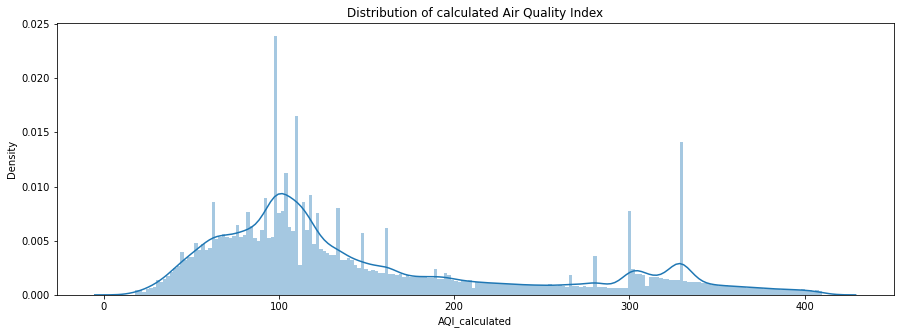

In [ ]:
plt.figure(figsize=(15,5)),
sns.distplot(data1['AQI_calculated'],bins=200)
plt.title('Distribution of calculated Air Quality Index')

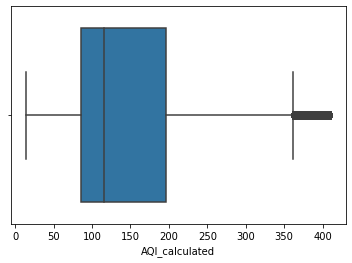

In [ ]:
sns.boxplot(data=data1,x='AQI_calculated')

In [ ]:
data1.to_csv('/content/sample_data/city_by_hour_final(mean).csv')

## **for data2**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of calculated Air Quality Index')

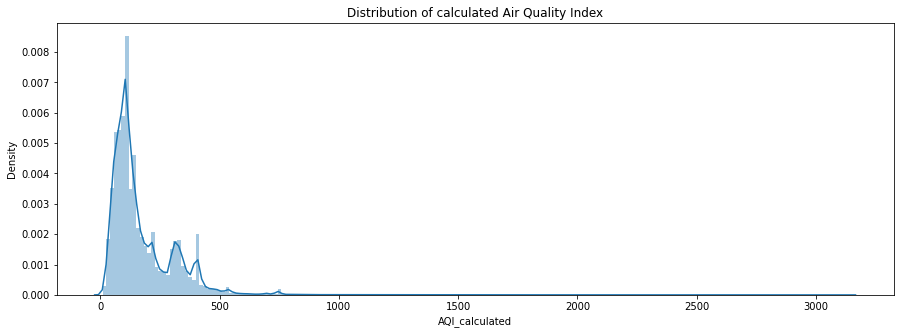

In [ ]:
plt.figure(figsize=(15,5)),
sns.distplot(data2['AQI_calculated'],bins=200)
plt.title('Distribution of calculated Air Quality Index')

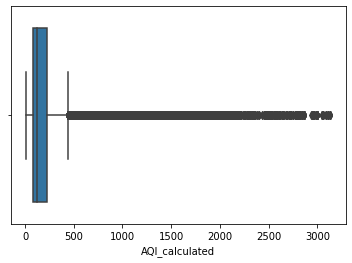

In [ ]:
sns.boxplot(data=data2,x='AQI_calculated')

In [ ]:
data2=outlier(data2)

86.0
226.0
140.0
-124.0 436.0


In [ ]:
data2

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,Ahmedabad,1/1/2015 1:00,36.60,120.06,1.00,40.01,36.37,24.450727,1.00,122.07,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,122.070000,36.370000,24.450727,1.00,153.58,61.000000,113.373333,114.023333,45.462500,6.112682,50.0,178.794118,7,179.0,Moderate
1,Ahmedabad,1/1/2015 2:00,36.60,120.06,0.02,27.75,19.73,24.450727,0.02,85.90,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,103.985000,28.050000,24.450727,1.00,153.58,61.000000,113.373333,107.995000,35.062500,6.112682,50.0,178.794118,7,179.0,Moderate
2,Ahmedabad,1/1/2015 3:00,36.60,120.06,0.08,19.32,11.08,24.450727,0.08,52.83,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,86.933333,22.393333,24.450727,1.00,153.58,61.000000,113.373333,102.311111,27.991667,6.112682,50.0,178.794118,7,179.0,Moderate
3,Ahmedabad,1/1/2015 4:00,36.60,120.06,0.30,16.45,9.20,24.450727,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,75.082500,19.095000,24.450727,1.00,153.58,61.000000,113.373333,93.853125,23.868750,6.112682,50.0,178.794118,7,179.0,Moderate
4,Ahmedabad,1/1/2015 5:00,36.60,120.06,0.12,14.90,7.85,24.450727,0.12,32.63,153.58,0.0,0.0,0.0,NaN,NaN,120.060000,36.600000,66.592000,16.846000,24.450727,1.00,153.58,61.000000,113.373333,83.240000,21.057500,6.112682,50.0,178.794118,7,179.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,6/30/2020 20:00,9.50,36.00,2.75,25.57,15.85,4.570000,0.62,1.85,27.75,0.0,0.0,0.0,51.0,Satisfactory,48.000000,16.156250,9.264583,17.695833,10.135000,0.66,50.73,26.927083,48.000000,11.580729,22.119792,2.533750,33.0,50.730000,7,51.0,Satisfactory
707871,Visakhapatnam,6/30/2020 21:00,17.25,49.25,3.62,33.20,20.62,3.780000,0.76,2.02,25.58,0.0,0.0,0.0,51.0,Satisfactory,48.447917,16.218750,9.118333,18.109167,10.036250,0.76,50.73,27.031250,48.447917,11.397917,22.636458,2.509062,38.0,50.730000,7,51.0,Satisfactory
707872,Visakhapatnam,6/30/2020 22:00,36.00,71.00,2.20,30.80,18.20,3.670000,0.58,1.77,26.15,0.0,0.0,0.0,50.0,Good,49.770833,16.895833,9.102500,18.496667,10.007917,0.76,41.55,28.159722,49.770833,11.378125,23.120833,2.501979,38.0,41.550000,7,50.0,Good
707873,Visakhapatnam,6/30/2020 23:00,15.75,63.00,1.02,28.90,16.00,3.800000,0.49,0.75,15.82,0.0,0.0,0.0,50.0,Good,49.968750,16.635417,9.115000,18.799583,10.031667,0.76,41.38,27.725694,49.968750,11.393750,23.499479,2.507917,38.0,41.380000,7,50.0,Good


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of calculated Air Quality Index')

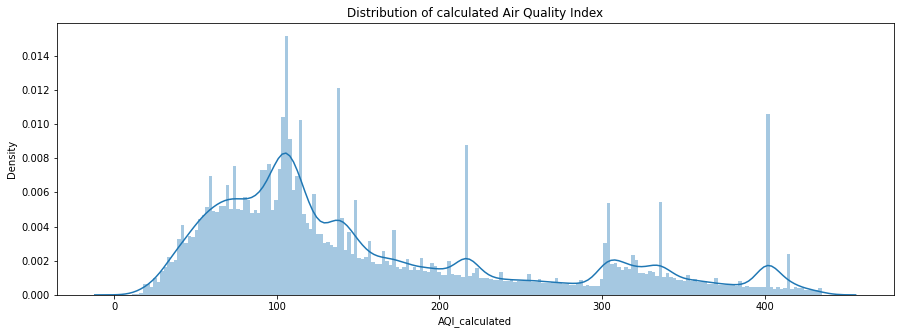

In [ ]:
plt.figure(figsize=(15,5)),
sns.distplot(data2['AQI_calculated'],bins=200)
plt.title('Distribution of calculated Air Quality Index')

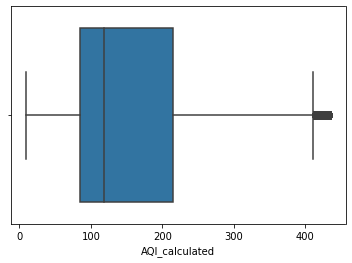

In [ ]:
sns.boxplot(data=data2,x='AQI_calculated')

In [ ]:
data2.to_csv('/content/sample_data/city_by_hour_final(ffill-bfill).csv')

## **for final_df**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of calculated Air Quality Index')

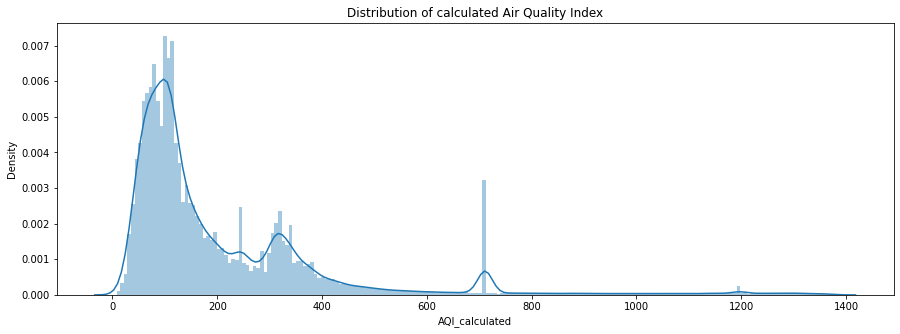

In [ ]:
plt.figure(figsize=(15,5)),
sns.distplot(final_df['AQI_calculated'],bins=200)
plt.title('Distribution of calculated Air Quality Index')

In [ ]:
final_df=outlier(final_df)

83.0
272.0
189.0
-200.5 555.5


In [ ]:
final_df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
9,Ahmedabad,72.410000,82.263333,2.05,13.78,16.08,2.05,15.14,95.586667,0.00,0.000000,0.000000,95.666667,NaN,NaN,84.643000,62.577333,96.698000,15.810000,0.685000,52.83,0.00,108.591111,84.643000,105.566000,19.762500,0.171250,510.764706,0.00,6,511.0,Severe
10,Ahmedabad,49.843333,81.966667,2.27,13.87,16.73,2.27,14.12,99.170000,0.00,0.000000,0.000000,160.333333,NaN,NaN,84.399697,61.419697,96.922727,15.893636,0.829091,39.53,0.00,104.732323,84.399697,105.640909,19.867045,0.207273,432.529412,0.00,6,433.0,Severe
11,Ahmedabad,92.430000,79.393333,1.73,12.87,14.63,1.73,13.26,91.670000,0.00,0.000000,0.000000,160.333333,NaN,NaN,83.982500,64.003889,96.485000,15.788333,0.904167,32.63,0.00,113.346296,83.982500,105.495000,19.735417,0.226042,391.941176,0.00,6,392.0,Very Poor
12,Ahmedabad,98.950000,79.393333,1.72,14.15,15.55,1.72,17.20,95.920000,0.00,0.000000,0.000000,133.333333,NaN,NaN,83.629487,66.692051,96.441538,15.770000,0.966923,29.87,0.00,122.306838,83.629487,105.480513,19.712500,0.241731,375.705882,0.00,6,376.0,Very Poor
13,Ahmedabad,52.340000,85.256667,1.85,15.74,17.62,1.85,18.78,131.736667,0.00,0.000000,0.000000,95.333333,NaN,NaN,83.745714,65.666905,98.962619,15.902143,1.030000,27.41,0.00,118.889683,83.745714,106.320873,19.877679,0.257500,361.235294,0.00,6,361.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,9.500000,36.000000,2.75,25.57,15.85,4.57,0.62,30.716667,27.75,3.933333,8.650000,1.500000,51.0,Satisfactory,48.000000,16.156250,11.166667,17.695833,10.135000,0.66,50.73,26.927083,48.000000,13.958333,22.119792,2.533750,33.000000,50.73,7,51.0,Satisfactory
707871,Visakhapatnam,17.250000,49.250000,3.62,33.20,20.62,3.78,0.76,2.020000,25.58,3.350000,7.420000,3.200000,51.0,Satisfactory,48.447917,16.218750,11.020417,18.109167,10.036250,0.76,50.73,27.031250,48.447917,13.775521,22.636458,2.509062,38.000000,50.73,7,51.0,Satisfactory
707872,Visakhapatnam,36.000000,71.000000,2.20,30.80,18.20,3.67,0.58,1.770000,26.15,3.610000,8.090000,2.490000,50.0,Good,49.770833,16.895833,11.004583,18.496667,10.007917,0.76,41.55,28.159722,49.770833,13.755729,23.120833,2.501979,38.000000,41.55,7,50.0,Good
707873,Visakhapatnam,15.750000,63.000000,1.02,28.90,16.00,3.80,0.49,0.750000,15.82,3.156667,6.833333,2.383333,50.0,Good,49.968750,16.635417,11.017083,18.799583,10.031667,0.76,41.38,27.725694,49.968750,13.771354,23.499479,2.507917,38.000000,41.38,7,50.0,Good


In [ ]:
final_df.shape

(663421, 32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of calculated Air Quality Index')

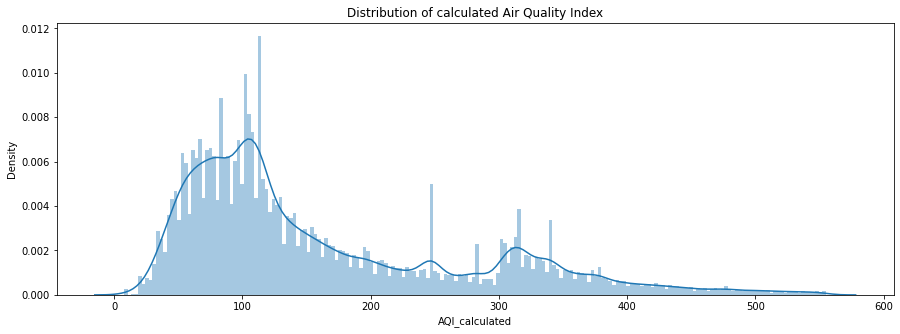

In [ ]:
plt.figure(figsize=(15,5)),
sns.distplot(final_df['AQI_calculated'],bins=200)
plt.title('Distribution of calculated Air Quality Index')

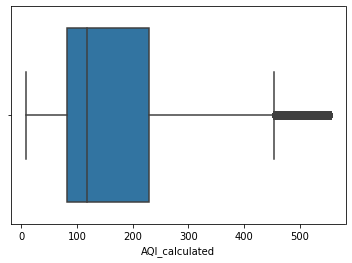

In [ ]:
sns.boxplot(data=final_df,x='AQI_calculated')

In [ ]:
final_df.to_csv('/content/sample_data/city_by_hour_final(KNN).csv')